In [26]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
sns.set(style='ticks')

In [16]:
dataset3= pd.read_csv("./Alzheimer's disease/descriptor_Butyrylcholinesterase.csv")
dataset3.rename(columns={'Name': 'molecule_chembl_id'}, inplace=True)  
dataset3

,smiles,pIC50,pubchemfp0,pubchemfp1,pubchemfp2,pubchemfp3,pubchemfp4,pubchemfp5,pubchemfp6,pubchemfp7,...,pubchemfp871,pubchemfp872,pubchemfp873,pubchemfp874,pubchemfp875,pubchemfp876,pubchemfp877,pubchemfp878,pubchemfp879,pubchemfp880
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,-2.963788,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,-2.954243,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,-4.698970,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,-3.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,-2.301030,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,-0.230449,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4062,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,-1.068186,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4063,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,-1.350248,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4064,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,-1.278754,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
dataset3 = dataset3[dataset3['pIC50'].notna()]
dataset3

,smiles,pIC50,pubchemfp0,pubchemfp1,pubchemfp2,pubchemfp3,pubchemfp4,pubchemfp5,pubchemfp6,pubchemfp7,...,pubchemfp871,pubchemfp872,pubchemfp873,pubchemfp874,pubchemfp875,pubchemfp876,pubchemfp877,pubchemfp878,pubchemfp879,pubchemfp880
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,-2.963788,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,-2.954243,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,-4.698970,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,-3.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,-2.301030,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,-0.230449,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4062,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,-1.068186,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4063,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,-1.350248,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4064,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,-1.278754,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dataset3= dataset3.drop(columns=['smiles'])
dataset3

,pIC50,pubchemfp0,pubchemfp1,pubchemfp2,pubchemfp3,pubchemfp4,pubchemfp5,pubchemfp6,pubchemfp7,pubchemfp8,...,pubchemfp871,pubchemfp872,pubchemfp873,pubchemfp874,pubchemfp875,pubchemfp876,pubchemfp877,pubchemfp878,pubchemfp879,pubchemfp880
0,-2.963788,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.954243,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-4.698970,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.301030,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,-0.230449,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4062,-1.068186,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4063,-1.350248,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4064,-1.278754,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X = dataset3.drop('pIC50', axis=1)
X

,pubchemfp0,pubchemfp1,pubchemfp2,pubchemfp3,pubchemfp4,pubchemfp5,pubchemfp6,pubchemfp7,pubchemfp8,pubchemfp9,...,pubchemfp871,pubchemfp872,pubchemfp873,pubchemfp874,pubchemfp875,pubchemfp876,pubchemfp877,pubchemfp878,pubchemfp879,pubchemfp880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4062,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4063,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4064,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
Y = dataset3.pIC50
Y

0      -2.963788
1      -2.954243
2      -4.698970
3      -3.000000
4      -2.301030
          ...   
4061   -0.230449
4062   -1.068186
4063   -1.350248
4064   -1.278754
4065   -0.230449
Name: pIC50, Length: 4054, dtype: float64

In [21]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
model = RandomForestRegressor(n_estimators=41)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
print('r-squared value',r2)

r-squared value 0.07407722573999154


In [24]:
Y_pred = model.predict(X_test)

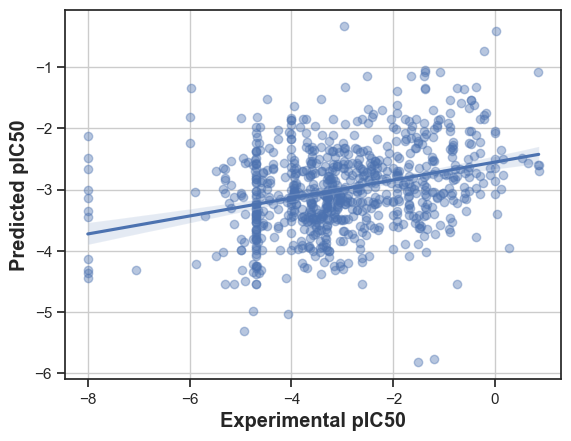

In [27]:
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.grid()
plt.show()